# Multiscale footprint with scprinter

In [1]:
%load_ext autoreload
%autoreload 2

We named is as scprinter, with scp for abbreviation

Following scanpy convention, we use scp.pp = preprocessing scp.tl = tools (computation stuff), scp.pl=plotting (visualizaiton related)

In [2]:
import time
import pandas as pd
import numpy as np

In [3]:
import scprinter as scp

## Section I: import fragments, get insertion and visualize insertion

Prepare the input data
- Fragments file
- barcode grouping 
    - optionally, cell type for each group
- regions

In [4]:
dataset = scp.datasets.BMMCTutorial()

Unzipping contents of '/home/rzhang/.cache/scprinter/scprinter_BMMCTutorial.zip' to '/home/rzhang/.cache/scprinter/scprinter_BMMCTutorial.zip.unzip'


In [5]:
# Loading barcode groups
barcodeGroups = pd.read_table(dataset['barcodeGrouping'], sep='\t')
# Get the unique barcodes, which would be used to filtering fragments
barcodes = np.unique(barcodeGroups.iloc[:, 0])
# get regions
regions = pd.read_table(dataset['region'], sep='\t', header=None)
regions.columns = ['Chromosome', 'Start', 'End']
print(barcodeGroups)


                                 barcode  group
0        T128.R1.124.R2.026.R3.048.P1.02      1
1        T128.R1.037.R2.155.R3.075.P1.06      1
2        T128.R1.057.R2.043.R3.017.P1.03      1
3        T128.R1.001.R2.057.R3.120.P1.02      1
4        T128.R1.041.R2.077.R3.050.P1.08      1
...                                  ...    ...
4999995  T124.R1.109.R2.097.R3.143.P1.04   1000
4999996  T128.R1.069.R2.095.R3.157.P1.03   1000
4999997  T128.R1.065.R2.068.R3.190.P1.01   1000
4999998  T128.R1.059.R2.126.R3.101.P1.02   1000
4999999  T128.R1.060.R2.103.R3.029.P1.06   1000

[5000000 rows x 2 columns]


In [6]:
group_info = pd.read_table(dataset['groupInfo'], sep='\t')
print(group_info)

     groupID  cellType     UMAP1      UMAP2  Pseudotime    color  \
0          1       CD4  9.001021   0.096889    0.977142  #005F9F   
1          2  CD16mono -8.828829   5.639757    0.367753  #F26625   
2          3  CD14mono -9.002045   2.610761    0.373777  #F28238   
3          4  late-Ery -8.157805 -10.942774    0.905431  #901838   
4          5        NK  3.967188  -6.635262    0.989003  #492264   
..       ...       ...       ...        ...         ...      ...   
995      996  late-Ery -8.127533 -10.584183    0.895157  #901838   
996      997  late-Ery -7.567782 -10.629585    0.874019  #901838   
997      998        NK  2.886501  -8.023002    0.996672  #492264   
998      999       CD8  3.166318  -3.892827    0.984040  #1481C4   
999     1000        NK  3.171761  -9.061001    0.997367  #492264   

     MyeloidProbs  ErythroidProbs  BLymphoidProbs  TLymphoidProbs  
0         0.00000             0.0             0.0        0.998463  
1         0.99921             0.0             0

using pp.import_fragments to turn fragments file into single cell insertion files

The first time you use a scp.genome.xx object, it will automatically download the gff / fa file. There might be some redundancy in that... as people might already have those... but they are not that big anyway...

In [7]:
import scprinter as scp
start = time.time()
printer = scp.pp.import_fragments(
                    path_to_frags= dataset['fragments'],
                    barcodes=barcodes,
                    savename='test_bmmc_tutorial.h5ad',
                    genome=scp.genome.hg38,
                    min_num_fragments=0, min_tsse=0,
                    sorted_by_barcode=False)
print ("takes", time.time()-start)

single input
Detecting the shift in the paired end fragments file
If you think the above message is wrong, please check the input file format
Minimum MSE is 0.0005993891696875, shift detected
Minimum MSE is 0.0007311543280125, shift detected
You are now using the beta auto_detect_shift function, this overwrites the plus_shift and minus_shift you provided
If you believe the auto_detect_shift is wrong, please set auto_detect_shift=False
detected plus_shift and minus_shift are 4 -5 for /home/rzhang/.cache/scprinter/scprinter_BMMCTutorial.zip.unzip/BMMCTutorialFragments.tsv
gzipping /home/rzhang/.cache/scprinter/scprinter_BMMCTutorial.zip.unzip/BMMCTutorialFragments.tsv, because currently the backend requires gzipped file


100%|█████████████████████████████████████| 11.2G/11.2G [00:00<00:00, 10.9TB/s]
Untarring contents of '/home/rzhang/.cache/scprinter/hg38Tn5Bias.tar.gz' to '/home/rzhang/.cache/scprinter/hg38Tn5Bias.tar.gz.untar'


creating bias bigwig (runs for new bias h5 file)
takes 2765.8164534568787


In [8]:
printer

head project
AnnData object with n_obs x n_vars = 89186 x 0 backed at 'test_bmmc_tutorial.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'frag_path', 'frag_sample_name', 'tsse'
    uns: 'bias_path', 'footprints', 'unique_string', 'reference_sequences', 'gff_db', 'bias_bw', 'binding score', 'insertion', 'genome'
    obsm: 'insertion_chrX', 'fragment_paired', 'insertion_chr15', 'insertion_chr2', 'insertion_chr8', 'insertion_chr12', 'insertion_chr16', 'insertion_chr17', 'insertion_chr11', 'insertion_chr20', 'insertion_chr3', 'insertion_chr1', 'insertion_chr13', 'insertion_chr4', 'insertion_chr19', 'insertion_chr6', 'insertion_chr5', 'insertion_chr10', 'insertion_chr14', 'insertion_chr18', 'insertion_chr22', 'insertion_chr7', 'insertion_chr9', 'insertion_chrY', 'insertion_chr21'


Turn dataframe into groupings

In [9]:
print(barcodeGroups)

                                 barcode  group
0        T128.R1.124.R2.026.R3.048.P1.02      1
1        T128.R1.037.R2.155.R3.075.P1.06      1
2        T128.R1.057.R2.043.R3.017.P1.03      1
3        T128.R1.001.R2.057.R3.120.P1.02      1
4        T128.R1.041.R2.077.R3.050.P1.08      1
...                                  ...    ...
4999995  T124.R1.109.R2.097.R3.143.P1.04   1000
4999996  T128.R1.069.R2.095.R3.157.P1.03   1000
4999997  T128.R1.065.R2.068.R3.190.P1.01   1000
4999998  T128.R1.059.R2.126.R3.101.P1.02   1000
4999999  T128.R1.060.R2.103.R3.029.P1.06   1000

[5000000 rows x 2 columns]


In [10]:
# It requires printer because it will map barcode names to the index in the insertion sparse matrix
grouping, uniq_groups = scp.utils.df2cell_grouping(printer, barcodeGroups)

First we can use the pl functions to get an idea of the dataset (plotting the Tn5 insertions)

Loading insertion profiles


<Axes: title={'center': 'Tn5 Insertion on chr20:56411665-56412665'}>

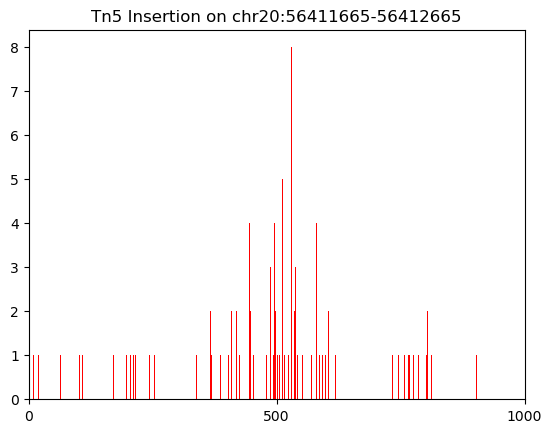

In [11]:
scp.pl.plot_region_atac(printer, # pass the printer project 
                        grouping[0], # plot the first group
                        regions.iloc[9], # plot the 10th region
                        color='red')

It can also plot more than one group in one plot

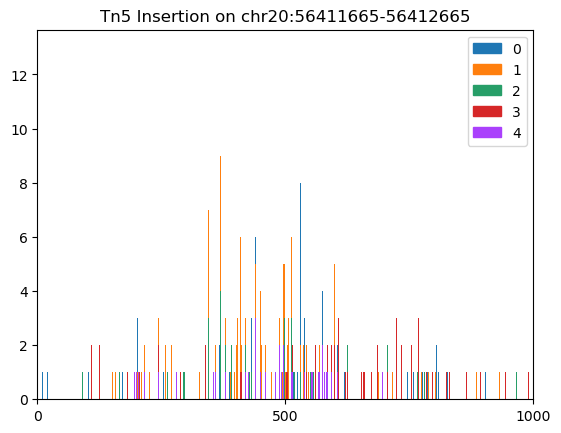

In [12]:
scp.pl.plot_group_atac(printer, 
                       grouping[0:5], 
                       np.arange(5),
                       regions.iloc[9])

You can also parse multiple axs into the function to plot them on different axes to make comparisons

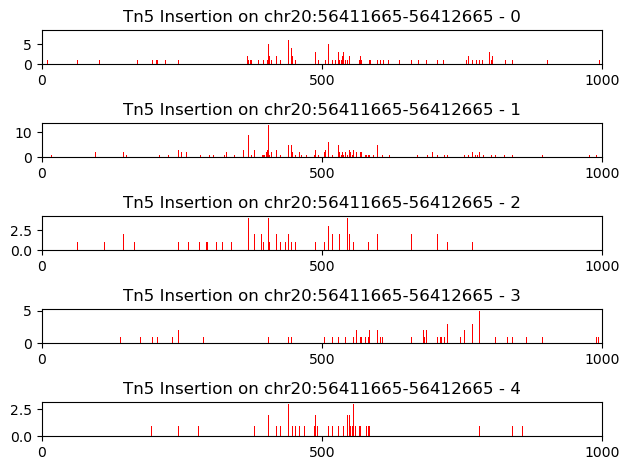

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 1)
scp.pl.plot_group_atac(printer, 
                       grouping[0:5], 
                       np.arange(5),
                       regions.iloc[9],
                       ax=list(axs), 
                       color="red")

You can also smooth the insertion profile with a window size (5 in this case)

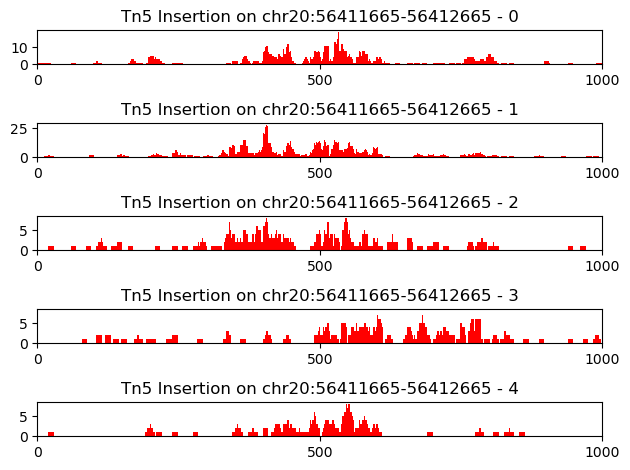

In [14]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 1)
scp.pl.plot_group_atac(printer, 
                       grouping[0:5], 
                       np.arange(5),
                       regions.iloc[9],
                       ax=list(axs), 
                       color="red",
                       smooth=5)

## Section II: Saving and Loading

By default, printer would automatically stay backed on-disk, so there is no need for an save function. However, after you are done using the printer, use `printer.close()` to close the object. Make sure you do that before closing a notebook, otherwise the file can be corrupted.

In [15]:
printer.close()
time.sleep(1)

You can load a printer object by this. 

In [16]:
# If you load it in the wrong genome when it's created, it will yell at you!
printer = scp.load_printer('test_bmmc_tutorial.h5ad', scp.genome.mm10)

AssertionError: Process data with hg38, but now loading with mm10

Now do it properly

In [17]:
printer = scp.load_printer('test_bmmc_tutorial.h5ad', scp.genome.hg38)

## Section III: Get TFBS score and visualization

Before running get_binding_score, you'll need to load dispersion model and load binidng score model. Note that the load_bindingscore_model takes two arguments. First, a keyword for the model, and second the address of the model. This is preserved for future models that are Nucleosome specific or ... specific family of TFs. 

In [18]:
printer.load_disp_model()
printer.load_bindingscore_model("TF",
                             scp.datasets.pretrained_TFBS_model)
printer.load_bindingscore_model("Nuc",
                             scp.datasets.pretrained_NucBS_model)

Some arguments to pay attention to, 
- `save_key` refers to a name to store this binding score results. After running the results, you'll need this to find the results. See details below.
- `backed` refers to whether create a new on-disk h5ad file to store results (and link back to the main project h5ad), or just get everything in memory
- `overwrite`, when there are results saved with the exact same `save_key`, do you want to overwrite it. 

Let's first try the in memory version

In [19]:
start = time.time()
scp.tl.get_binding_score(
    printer,
    grouping,
    uniq_groups,
    regions,
    model_key='TF',
    n_jobs=32, # nCores to use
    contextRadius=100,
    save_key="trial",
    backed=False,
    overwrite=True)
print ("takes", time.time()-start)

Creating trial in printer.bindingscoreadata
obs=groups, var=regions
Loading insertion profiles
Start to get biases
Finish getting biases


submitting jobs:   0%|          | 0/5 [00:00<?, ?it/s]

collecting Binding prediction:   0%|          | 0/10 [00:00<?, ?it/s]

finishes
takes 236.52593898773193


So how to get the results? Well, we can just print the printer, to see where it stores stuff.

In [20]:
print (printer)

head project
AnnData object with n_obs x n_vars = 89186 x 0 backed at 'test_bmmc_tutorial.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'frag_path', 'frag_sample_name', 'tsse'
    uns: 'bias_path', 'footprints', 'binding score', 'gff_db', 'insertion', 'bias_bw', 'unique_string', 'genome', 'reference_sequences'
    obsm: 'insertion_chr9', 'insertion_chr5', 'insertion_chr16', 'insertion_chr18', 'insertion_chr15', 'insertion_chrY', 'insertion_chr19', 'insertion_chr2', 'insertion_chr4', 'insertion_chr22', 'fragment_paired', 'insertion_chr11', 'insertion_chr7', 'insertion_chrX', 'insertion_chr3', 'insertion_chr14', 'insertion_chr1', 'insertion_chr10', 'insertion_chr17', 'insertion_chr13', 'insertion_chr21', 'insertion_chr12', 'insertion_chr6', 'insertion_chr8', 'insertion_chr20'
detected 1 bindingscoreadata
name trial
AnnData object with n_obs × n_vars = 1000 × 10
    obs: 'name', 'id'
    var: 'Chromosome', 'Start', 'End', 'identifier'
    uns: 'sites', 'version'
    obsm: 10 regio

You see stuff like 

```
detected 1 bindingscoreadata 
name trial
```

There are our results. We can get it by:

In [21]:
adata = printer.bindingscoreadata['trial']
print (adata)
print (adata.obs)
print (adata.var)
a = adata.obsm['chr20:56362453-56363453']
print (a.shape)

AnnData object with n_obs × n_vars = 1000 × 10
    obs: 'name', 'id'
    var: 'Chromosome', 'Start', 'End', 'identifier'
    uns: 'sites', 'version'
    obsm: 'chr20:56362453-56363453', 'chr20:56372619-56373619', 'chr20:56358378-56359378', 'chr20:56360346-56361346', 'chr20:56391915-56392915', 'chr20:56399697-56400697', 'chr20:56373657-56374657', 'chr20:56376099-56377099', 'chr20:56409242-56410242', 'chr20:56411665-56412665'
      name   id
1        1    0
2        2    1
3        3    2
4        4    3
5        5    4
...    ...  ...
996    996  995
997    997  996
998    998  997
999    999  998
1000  1000  999

[1000 rows x 2 columns]
                        Chromosome     Start       End  \
chr20:56358378-56359378      chr20  56358378  56359378   
chr20:56360346-56361346      chr20  56360346  56361346   
chr20:56362453-56363453      chr20  56362453  56363453   
chr20:56372619-56373619      chr20  56372619  56373619   
chr20:56373657-56374657      chr20  56373657  56374657   
chr20:5

Each bindingscoreadata returns an in-memory adata, where the obs = groups, var=regions, and obsm stores the binding score results, named after each region. The shape of the final binding score = (1000, 80) = 1000 groups, 80 sites

**BUT!** This is the in-memory results, once you close the printer, or kills python process, everything goes away. This is more suitable if you want to quickly calculate and plot a few regions, now for genome-wide computation.

In [22]:
printer.close()
time.sleep(1)

In [23]:
printer = scp.load_printer('test_bmmc_tutorial.h5ad', scp.genome.hg38)
print(printer)

head project
AnnData object with n_obs x n_vars = 89186 x 0 backed at 'test_bmmc_tutorial.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'frag_path', 'frag_sample_name', 'tsse'
    uns: 'gff_db', 'binding score', 'insertion', 'footprints', 'bias_bw', 'reference_sequences', 'bias_path', 'genome', 'unique_string'
    obsm: 'insertion_chr2', 'insertion_chr4', 'insertion_chrX', 'fragment_paired', 'insertion_chr1', 'insertion_chr14', 'insertion_chr10', 'insertion_chr3', 'insertion_chr6', 'insertion_chr11', 'insertion_chr19', 'insertion_chr8', 'insertion_chr7', 'insertion_chr9', 'insertion_chr15', 'insertion_chr18', 'insertion_chr20', 'insertion_chr13', 'insertion_chr21', 'insertion_chr5', 'insertion_chr16', 'insertion_chr22', 'insertion_chrY', 'insertion_chr12', 'insertion_chr17'



See? The bindingscoreadata disappears. 

So what about on disk version?

In [24]:
# Everytime a printer got reload from the disk, you need to reload the binding score model
printer.load_disp_model()
printer.load_bindingscore_model("TF",
                             scp.datasets.pretrained_TFBS_model)
start = time.time()
scp.tl.get_binding_score(
    printer,
    grouping,
    uniq_groups,
    regions,
    model_key='TF',
    n_jobs=100,
    contextRadius=100,
    save_key="trial",
    backed=True,
    overwrite=True)
print ("takes", time.time()-start)

Creating trial in printer.bindingscoreadata
obs=groups, var=regions
Loading insertion profiles
Start to get biases
Finish getting biases


submitting jobs:   0%|          | 0/5 [00:00<?, ?it/s]

collecting Binding prediction:   0%|          | 0/10 [00:00<?, ?it/s]

finishes
takes 256.58949851989746


It's back! and same stuff

In [25]:
print (printer)
adata = printer.bindingscoreadata['trial']
print (adata)
print (adata.obs)
print (adata.var)
a = adata.obsm['chr20:56362453-56363453']
print (a.shape)

head project
AnnData object with n_obs x n_vars = 89186 x 0 backed at 'test_bmmc_tutorial.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'frag_path', 'frag_sample_name', 'tsse'
    uns: 'gff_db', 'binding score', 'insertion', 'footprints', 'bias_bw', 'reference_sequences', 'bias_path', 'genome', 'unique_string'
    obsm: 'insertion_chr2', 'insertion_chr4', 'insertion_chrX', 'fragment_paired', 'insertion_chr1', 'insertion_chr14', 'insertion_chr10', 'insertion_chr3', 'insertion_chr6', 'insertion_chr11', 'insertion_chr19', 'insertion_chr8', 'insertion_chr7', 'insertion_chr9', 'insertion_chr15', 'insertion_chr18', 'insertion_chr20', 'insertion_chr13', 'insertion_chr21', 'insertion_chr5', 'insertion_chr16', 'insertion_chr22', 'insertion_chrY', 'insertion_chr12', 'insertion_chr17'
detected 1 bindingscoreadata
name trial
AnnData object with n_obs x n_vars = 1000 x 10 backed at 'test_bmmc_tutorial_supp/trial.h5ad'
    obs: 'name', 'id'
    var: 'Chromosome', 'Start', 'End', 'identifier'

Even if close and reload

In [26]:
printer.close()
time.sleep(2)
printer = scp.load_printer('test_bmmc_tutorial.h5ad', scp.genome.hg38)
print(printer)

loading trial test_bmmc_tutorial_supp/trial.h5ad
head project
AnnData object with n_obs x n_vars = 89186 x 0 backed at 'test_bmmc_tutorial.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'frag_path', 'frag_sample_name', 'tsse'
    uns: 'reference_sequences', 'bias_bw', 'insertion', 'binding score', 'bias_path', 'gff_db', 'footprints', 'genome', 'unique_string'
    obsm: 'insertion_chr14', 'insertion_chr2', 'insertion_chr20', 'insertion_chr21', 'insertion_chr17', 'insertion_chr4', 'insertion_chr5', 'insertion_chr6', 'insertion_chr10', 'insertion_chr1', 'insertion_chr15', 'insertion_chr19', 'insertion_chr13', 'insertion_chr16', 'insertion_chr18', 'insertion_chr8', 'insertion_chrX', 'insertion_chr7', 'insertion_chr12', 'insertion_chr11', 'insertion_chrY', 'insertion_chr3', 'insertion_chr22', 'fragment_paired', 'insertion_chr9'
detected 1 bindingscoreadata
name trial
AnnData object with n_obs x n_vars = 1000 x 10 backed at 'test_bmmc_tutorial_supp/trial.h5ad'
    obs: 'name', 'id'
  

Now let's visualize it!

<Axes: title={'center': 'Binding Score on chr20:56358378-56359378'}>

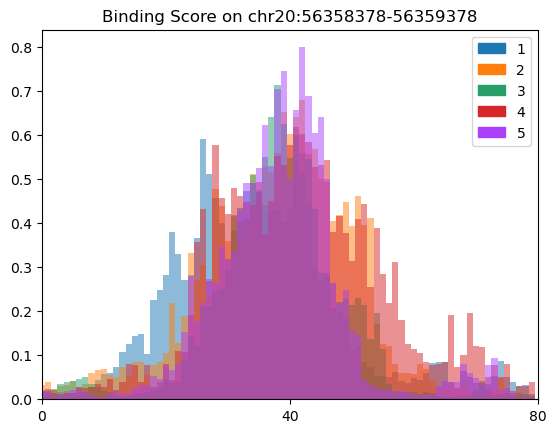

In [27]:
scp.pl.plot_binding_score(printer,
                       save_key='trial',
                       group_names=uniq_groups[:5],
                       region=regions.iloc[0],
                       ax=None,
                       alpha=0.5)

You can also stack them into a heatmap!

sort the cells

In [28]:
order = np.argsort(group_info['cellType']) # We sort the group based on cell type

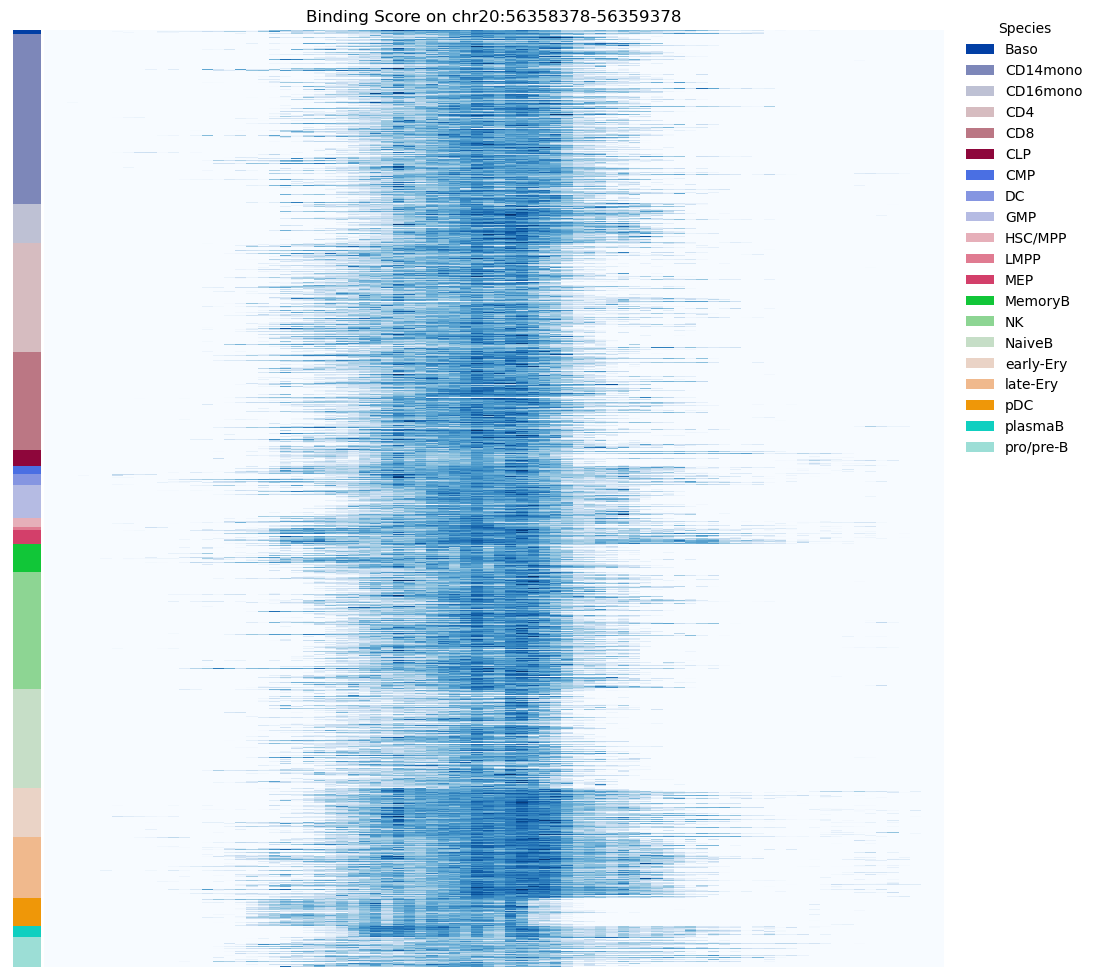

In [29]:
scp.pl.plot_binding_score(printer,
                       save_key='trial',
                       group_names=uniq_groups[order],
                       kind='heatmap',
                       region=regions.iloc[0],
                       ax=None,
                       vmin=0.2, 
                       vmax=0.8,
                       row_label=np.array(group_info['cellType'])[order])

In [30]:
printer.close()

## Section III: Get Multi-scal footprinting score and visualization

warnings: This file can be really large when running it on thousands of groups and more than 10,000 regions!

In [31]:
printer = scp.load_printer('test_bmmc_tutorial.h5ad', scp.genome.hg38)
printer.load_disp_model()
start = time.time()
scp.tl.get_footprint_score(
    printer,
    grouping,
    uniq_groups,
    regions,
    modes=np.arange(2, 101),
    footprintRadius=None,
    flankRadius=None,
    n_jobs=32,
    save_key="trial_footprints",
    backed=True,
    overwrite=True)
print ("takes", time.time()-start)
print(printer)

loading trial test_bmmc_tutorial_supp/trial.h5ad
estimated file size: 3.67 GB
Creating trial_footprints in printer.footprintsadata
obs=groups, var=regions
100 16
Loading insertion profiles


Submitting jobs:   0%|          | 0/990 [00:00<?, ?it/s]

collecting multi-scale footprints:   0%|          | 0/990 [00:00<?, ?it/s]

takes 390.12911105155945
head project
AnnData object with n_obs x n_vars = 89186 x 0 backed at 'test_bmmc_tutorial.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'frag_path', 'frag_sample_name', 'tsse'
    uns: 'bias_bw', 'genome', 'unique_string', 'gff_db', 'insertion', 'binding score', 'bias_path', 'reference_sequences', 'footprints'
    obsm: 'insertion_chr8', 'insertion_chrY', 'insertion_chr17', 'insertion_chr1', 'insertion_chr5', 'insertion_chr2', 'insertion_chr20', 'insertion_chr18', 'insertion_chr9', 'insertion_chr7', 'insertion_chr3', 'insertion_chr21', 'insertion_chrX', 'insertion_chr4', 'insertion_chr13', 'insertion_chr10', 'insertion_chr11', 'insertion_chr14', 'insertion_chr12', 'fragment_paired', 'insertion_chr15', 'insertion_chr19', 'insertion_chr22', 'insertion_chr16', 'insertion_chr6'
detected 1 bindingscoreadata
name trial
AnnData object with n_obs x n_vars = 1000 x 10 backed at 'test_bmmc_tutorial_supp/trial.h5ad'
    obs: 'name', 'id'
    var: 'Chromosome', 'St

Now we have one bindingscoreadata (from above binding score prediction) and one footprintsadata from the footprinting experiment!

In [32]:
adata = printer.footprintsadata['trial_footprints']
a = adata.obsm['chr20:56411665-56412665']
print (a.shape)

(1000, 99, 1000)


shape of (#groups, #scales, #positions)

Visualize multiscale footprint! One per group

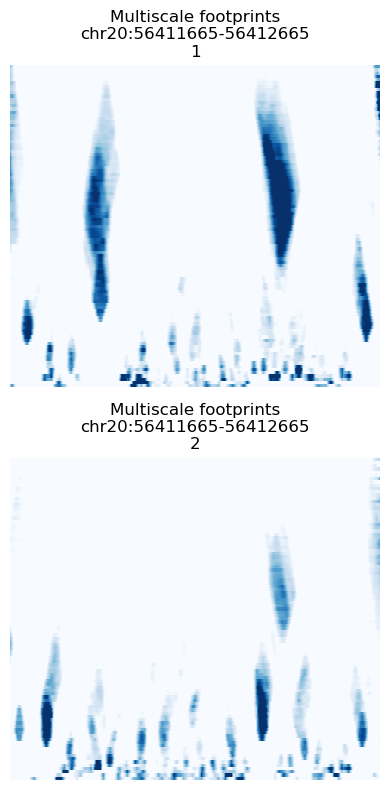

In [33]:
scp.pl.plot_footprints(printer,
                    save_key='trial_footprints',
                    group_names=uniq_groups[:2],
                    region=regions.iloc[9],
                    scales=None,
                    ax=None,
                    cmap='Blues',
                    vmin=0.5,
                    vmax=2.0)

You can also stack one scale across multiple groups!

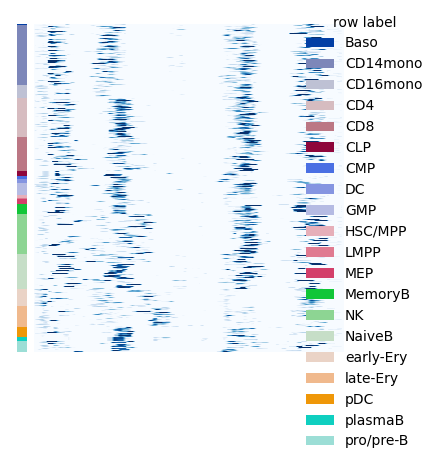

In [34]:
scp.pl.plot_footprints(printer,
                    save_key='trial_footprints',
                    group_names=uniq_groups[order], # Again we sort the groups based on their cell type
                    row_label=np.array(group_info['cellType'])[order],
                    region=regions.iloc[9],
                    stack=True,
                    scales=[50],
                    ax=None,
                    cmap='Blues',
                    vmin=0.5,
                    vmax=2.0)

There's still some issue for aligning stuff. Basically, footprints are [100,900], binding score are [100, 900] but with 10bp resolution, insertion are [0, 1000]. As a temporal solution, one can manually adjust insertion range.

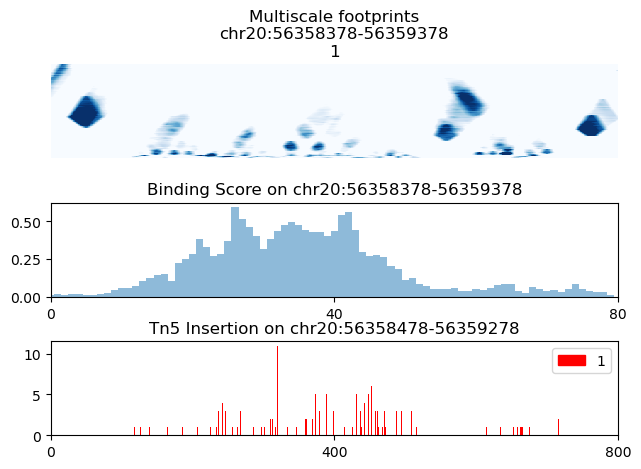

In [35]:
fig, axs = plt.subplots(3, 1)
scp.pl.plot_footprints(printer,
                    save_key='trial_footprints',
                    group_names=uniq_groups[0],
                    region=regions.iloc[0],
                    scales=None,
                    ax=axs[0],
                    cmap='Blues',
                    vmin=0.5,
                    vmax=2.0)
scp.pl.plot_binding_score(printer,
                       save_key='trial',
                       group_names=uniq_groups[0],
                       region=regions.iloc[0],
                       ax=axs[1],
                       alpha=0.5)
scp.pl.plot_group_atac(printer, 
                       grouping[0], 
                       uniq_groups[0],
                       "chr20:56358478-56359278",
                       ax=axs[2], 
                       color="red")

In [36]:
printer

head project
AnnData object with n_obs x n_vars = 89186 x 0 backed at 'test_bmmc_tutorial.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'frag_path', 'frag_sample_name', 'tsse'
    uns: 'bias_bw', 'genome', 'unique_string', 'gff_db', 'insertion', 'binding score', 'bias_path', 'reference_sequences', 'footprints'
    obsm: 'insertion_chr8', 'insertion_chrY', 'insertion_chr17', 'insertion_chr1', 'insertion_chr5', 'insertion_chr2', 'insertion_chr20', 'insertion_chr18', 'insertion_chr9', 'insertion_chr7', 'insertion_chr3', 'insertion_chr21', 'insertion_chrX', 'insertion_chr4', 'insertion_chr13', 'insertion_chr10', 'insertion_chr11', 'insertion_chr14', 'insertion_chr12', 'fragment_paired', 'insertion_chr15', 'insertion_chr19', 'insertion_chr22', 'insertion_chr16', 'insertion_chr6'
detected 1 bindingscoreadata
name trial
AnnData object with n_obs x n_vars = 1000 x 10 backed at 'test_bmmc_tutorial_supp/trial.h5ad'
    obs: 'name', 'id'
    var: 'Chromosome', 'Start', 'End', 'identifier'

In [37]:
printer.close()

## Section IV: Get realtime sync visualization of multi-scale footprints

first we need to use pp.sync_footprints to generate pseudo-bulk bigwig insertion profile to prepare for visualization

In [42]:
printer = scp.load_printer('test_bmmc_tutorial.h5ad', scp.genome.hg38)
# Turn dataframe into groupings
# It requires printer because it will map barcode names to the index in the insertion sparse matrix
grouping, uniq_groups = scp.utils.df2cell_grouping(printer, barcodeGroups)

loading trial test_bmmc_tutorial_supp/trial.h5ad
loading trial_footprints test_bmmc_tutorial_supp/trial_footprints.h5ad


In [43]:
scp.pp.export_bigwigs(printer,
                    grouping[0:3],
                    uniq_groups[0:3])

Loading insertion profiles
Creating bigwig for 1


  0%|          | 0/24 [00:00<?, ?it/s]

Creating bigwig for 2


  0%|          | 0/24 [00:00<?, ?it/s]

Creating bigwig for 3


  0%|          | 0/24 [00:00<?, ?it/s]

In [44]:
printer.load_disp_model()

In [45]:
import pandas as pd
import plotly.io as pio
import plotly.graph_objs as go
pio.renderers.default = 'iframe'
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
py.init_notebook_mode()

In [46]:
motif = scp.motifs.JASPAR2022_core_Motifs(scp.genome.hg38, bg='genome')
motif.prep_scanner(
    ['CTCF', 'IKZF1', 'GATA1'],
    pseudocount=1e-4,
    pvalue=5e-5,
    window=7
)

<MOODS.scan.Scanner; proxy of <Swig Object of type 'MOODS::scan::Scanner *' at 0x7f2257d7ca80> >

In [47]:
# Unlike staic plot dynamic plot the axis are always matched
scp.pl.sync_footprints(printer,
                    uniq_groups[0:2],
                    init_region='chr20:56358478-56359478',
                    motif_scanner=motif,
                    plotgenes=True)

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'base': [],
              'hovertemplate': 'TF=IKZF1<br>Start=%{base:,}<br>End=%{x:,}<extra></extra>',
              'legendgroup': 'IKZF1',
              'marker': {'color': '#279e68', 'pattern': {'shape': ''}},
              'name': 'IKZF1',
              'offsetgroup': 'IKZF1',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'uid': '7a62914b-8996-4892-8b4d-9bdbe4d02781',
              'width': 1,
              'x': [],
              'xaxis': 'x',
              'y': [],
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'base': [],
              'hovertemplate': 'TF=GATA1<br>Start=%{base:,}<br>End=%{x:,}<extra></extra>',
              'legendgroup': 'GATA1',
              'marker': {'color': '#ff7f0e', 'pattern': {'shape': ''}},
              'name': 'GATA1',
              'offsetgrou

In [48]:
printer.close()